## B

In [1]:
import numpy as np
from scipy import stats
from scipy.integrate import quad
import scipy.integrate as integrate
from numpy import sqrt, exp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
gamma = 0.01

### Результати, що мають вийти
```
Method 1  (Monte Carlo method)
 
gamma = 0,99  z_gamma = 2,575  epsilon = 0,01
alpha = 1     Prob = 0,454526854547315      Var = 0,247932217835858  N_req = 79574
Time used = 00:00:02.2683796
        
 
gamma = 0,99  z_gamma = 2,575  epsilon = 0,01
alpha = 0,1     Prob = 0,000200469121270386      Var = 0,000200428934007897  N_req = 330689123
Time used = 00:02:13.2619116
```

In [2]:
def integrand(x,alpha):
    return (1-exp(-(x*alpha)**4))*x*exp(-(x**2))  # рахуємо інтеграл

In [11]:
z_gamma2 = 2.575**2
eps2 = 0.01**2

In [12]:
pd.DataFrame({'alpha':[1,0.1,0.01], 'Q':[str(2*quad(integrand, 0, np.inf, args=1)[0]), 
                                         str(2*quad(integrand, 0, np.inf, args=0.1)[0]),
                                         str(2*quad(integrand, 0, np.inf, args=0.01)[0])],
                                    "По формулі":[2*(1**4),str(2*(0.1**4)),str(2*(0.01**4))]})

,alpha,Q,По формулі
0,1.00,0.45435863923495345,2
1,0.10,0.00019988011983236367,0.00020000000000000004
2,0.01,1.9998825529399698e-08,2e-08


In [13]:
def sigma_B(n,alpha): # метод Монте- Карло
    w = np.random.uniform(0,1,size=n) # генеруємо n н.о.р в.в
    w1 = np.random.uniform(0,1,size=n) # генеруємо n н.о.р в.в
    ksi = (1/alpha)*np.power(-np.log(w),1/4) # рахуємо ксі
    eta = np.power(-np.log(w1),1/2) # рахуємо ета
    r = ksi[ksi<eta].shape[0] # векторизований індикатор
    Q = r/n # оцінка Q
    sigma2 = Q*(1-Q) # дисперсія
    return (sigma2,Q) # повертає два значення (дисперсію, та  оцінку)

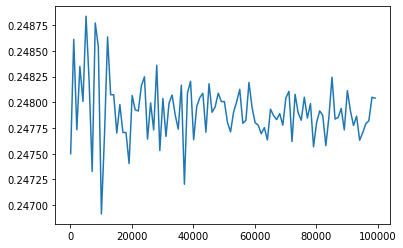

In [15]:
# графік візуальної зміни дисперсії для альфа=1
n_list  = np.arange(100,10**5,10**3)
sigma_list = [sigma_B(i,alpha=1)[0] for i in n_list]
plt.plot(n_list,sigma_list)
plt.show()

In [21]:
# alpha = 1

In [19]:
n0 = 70000 #alpha==1
data = sigma_B(n0,alpha=1)
n_ =  int(z_gamma2*data[0]/(eps2*(data[1]**2)))+1
n_  

79436

In [20]:
sigma_B(n_,alpha =1)

(0.2476436526182734, 0.4514577773301778)

In [ ]:
# alpha = 0.1

In [23]:
n0 = 330689123 #alpha==1
data = sigma_B(n0,alpha=1)
n_ =  int(z_gamma2*data[0]/(eps2*(data[1]**2)))+1
n_

330689123

In [76]:
sigma_B(330689123,alpha=0.1)

(0.00019936201967724689, 0.00019940178074741213)